In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

tokenizer = info.features['text'].encoder

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D0712 06:48:42.830450709      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0712 06:48:42.830472934      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0712 06:48:42.830476367      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0712 06:48:42.830479051      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0712 06:48:42.830481644      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0712 06:48:42.830484404      15 config.cc:119]     

Dl Completed...: 0 url [00:00, ? url/s]
Generating train examples...: 100%|█████████▉| 24960/25000 [00:39<00:00, 463.32 examples/s]
                                                                                           
Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJT8ZE2/imdb_reviews-train.tfrecord*...:   0%|          | 0/25000 [00:00<?, ? examples/s]
Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJT8ZE2/imdb_reviews-train.tfrecord*...:  76%|███████▋  | 19076/25000 [00:00<00:00, 190743.81 examples/s]
Generating test examples...: 100%|█████████▉| 24942/25000 [00:34<00:00, 755.49 examples/s]
                                                                                          
Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJT8ZE2/imdb_reviews-test.tfrecord*...:   0%|          | 0/25000 [00:00<?, ? examples/s]
Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJT8ZE2/i

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset['train'], dataset['test'], 

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [5]:
import tensorflow as tf
import numpy as np


batch_size = 1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'filters: {filters}')
print(f'kernel_size: {kernel_size}')

random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape of input array: {random_input.shape}')

conv1d = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')
result = conv1d(random_input)
print(f'shape of conv1d output: {result.shape}')

gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f'shape of global max pooling output: {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 20
filters: 128
kernel_size: 5
shape of input array: (1, 20, 20)
shape of conv1d output: (1, 16, 128)
shape of global max pooling output: (1, 128)


In [8]:
import tensorflow as tf

embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d_3 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 33s 322ms/step - loss: 0.6354 - accuracy: 0.6306 - val_loss: 0.4521 - val_accuracy: 0.7896
Epoch 2/10
98/98 [==============================] - 29s 297ms/step - loss: 0.3088 - accuracy: 0.8688 - val_loss: 0.2664 - val_accuracy: 0.8893
Epoch 3/10
98/98 [==============================] - 29s 295ms/step - loss: 0.1611 - accuracy: 0.9437 - val_loss: 0.2780 - val_accuracy: 0.8878
Epoch 4/10
98/98 [==============================] - 29s 297ms/step - loss: 0.0771 - accuracy: 0.9801 - val_loss: 0.2792 - val_accuracy: 0.8942
Epoch 5/10
98/98 [==============================] - 29s 297ms/step - loss: 0.0285 - accuracy: 0.9967 - val_loss: 0.3137 - val_accuracy: 0.8929
Epoch 6/10
98/98 [==============================] - 29s 296ms/step - loss: 0.0103 - accuracy: 0.9996 - val_loss: 0.3395 - val_accuracy: 0.8936
Epoch 7/10
98/98 [==============================] - 29s 298ms/step - loss: 0.0049 - accuracy: 0.9999 - val_loss: 0.3612 - val_accuracy: 0.8934

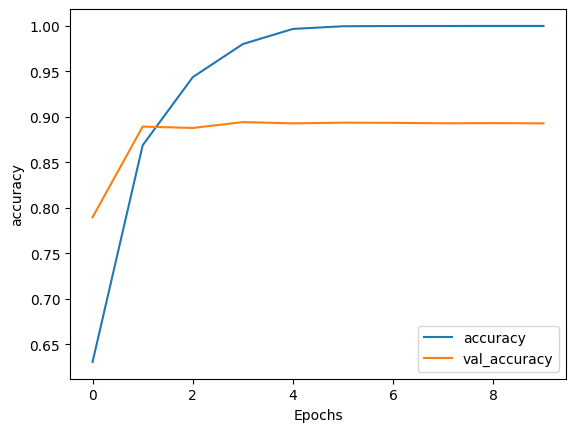

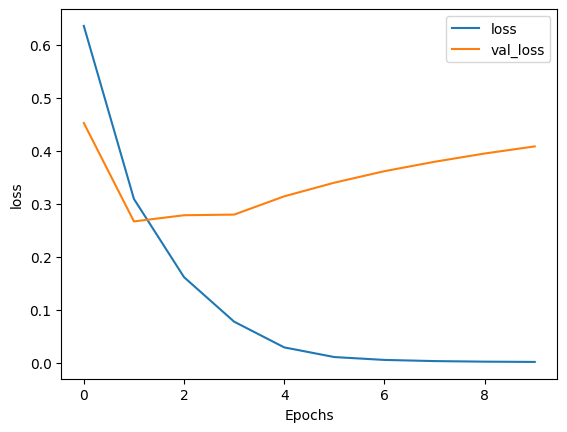

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")